## How well do jobs and skills pay for Data Analysts?

#### Methodology

- Evaluate median salary for top data jobs
- Find median salary per skill for Data Analysts
- Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# filter for the job titles and country
df_UAE = df[(df['job_country'] == 'United Arab Emirates')].dropna(subset= ['salary_year_avg'])

In [3]:
job_titles = df_UAE['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Senior Data Analyst',
 'Senior Data Scientist',
 'Machine Learning Engineer',
 'Software Engineer']

In [4]:
df_UAE_top_6 = df_UAE[df_UAE['job_title_short'].isin(job_titles)]

In [14]:
job_order = df_UAE_top_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Senior Data Analyst', 'Data Analyst', 'Data Engineer',
       'Software Engineer', 'Senior Data Scientist',
       'Machine Learning Engineer'],
      dtype='object', name='job_title_short')

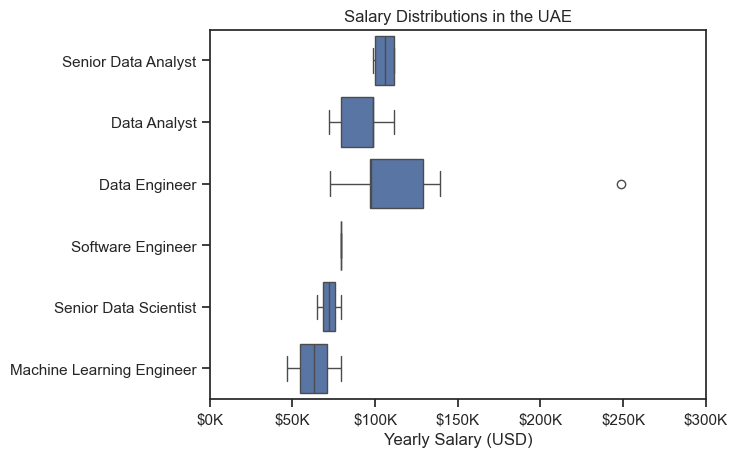

In [13]:
sns.boxplot(data=df_UAE_top_6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the UAE')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

### Investigate Median Salary Vs Skills for Data Analysts

In [15]:
df_DA_UAE = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Arab Emirates')].copy()

df_DA_UAE = df_DA_UAE.dropna(subset= ['salary_year_avg'])

In [16]:
df_DA_UAE = df_DA_UAE.explode('job_skills')

df_DA_UAE[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
55758,72000.0,sql
55758,72000.0,python
55758,72000.0,aws
55758,72000.0,power bi
55758,72000.0,tableau


In [27]:
df_DA_top_pay = df_DA_UAE.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay

,count,median
job_skills,,
looker,1,98500.0
sql,5,98500.0
power bi,3,98500.0
r,3,98500.0
python,4,88850.0
tableau,4,88850.0
aws,1,72000.0
powerpoint,1,72000.0
excel,1,72000.0


In [28]:
df_DA_skills = df_DA_UAE.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
sql,5,98500.0
power bi,3,98500.0
r,3,98500.0
looker,1,98500.0
python,4,88850.0
tableau,4,88850.0
aws,1,72000.0
powerpoint,1,72000.0
excel,1,72000.0


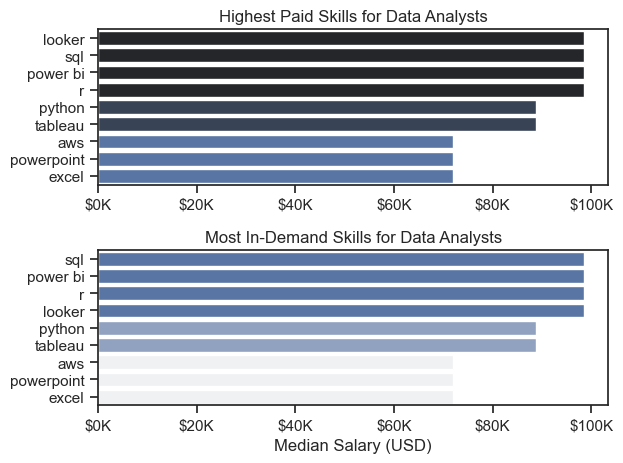

In [29]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

# Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r') 
ax[0].legend().remove()

#df_DA_top_pay[::-1].plot(kind= 'barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Highest Paid Skills for Data Analysts')
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b') 
ax[1].legend().remove()

#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()